# Performing EDA on FIFA World Cup Dataset  

**fifa_ranking_2022-10-06 - fifa_ranking_2022-10-06.csv**: containing ranking and other related data of matches from year 1930 to 2022.

**matches_1930_2022 - matches_1930_2022.csv**: containing detailed data of all the matches from year 1930 to 2022.

**world_cup - world_cup.csv**: containing basic data like winner, host, runner up etc of all the matches from year 1930 to 2022.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
world_cup = pd.read_csv('world_cup - world_cup.csv')
fifa_ranking = pd.read_csv('fifa_ranking_2022-10-06 - fifa_ranking_2022-10-06.csv')
matches = pd.read_csv('matches_1930_2022 - matches_1930_2022.csv')

In [3]:
world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [4]:
fifa_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [5]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [6]:
print("world cup shape:", world_cup.shape)
print("fifa ranking shape:", fifa_ranking.shape)
print("matches shape:", matches.shape)

world cup shape: (22, 9)
fifa ranking shape: (211, 7)
matches shape: (964, 44)


In [7]:
print("world cup columns:", world_cup.columns)
print("\nfifa ranking columns:", fifa_ranking.columns)
print("\nmatches columns:", matches.columns)

world cup columns: Index(['Year', 'Host', 'Teams', 'Champion', 'Runner-Up', 'TopScorrer',
       'Attendance', 'AttendanceAvg', 'Matches'],
      dtype='object')

fifa ranking columns: Index(['team', 'team_code', 'association', 'rank', 'previous_rank', 'points',
       'previous_points'],
      dtype='object')

matches columns: Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       

In [8]:
print(f"world_cup: \n{world_cup.isnull().sum()}")

world_cup: 
Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64


In [9]:
print(f"FIFA ranking: \n{fifa_ranking.isnull().sum()}")

FIFA ranking: 
team               0
team_code          0
association        0
rank               0
previous_rank      0
points             0
previous_points    0
dtype: int64


In [10]:
print(f"matches: \n{matches.isnull().sum()}")

matches: 
home_team                            0
away_team                            0
home_score                           0
home_xg                            836
home_penalty                       929
away_score                           0
away_xg                            836
away_penalty                       929
home_manager                         0
home_captain                       320
away_manager                         0
away_captain                       320
Attendance                           0
Venue                                0
Officials                          255
Round                                0
Date                                 0
Score                                0
Referee                            255
Notes                              891
Host                                 0
Year                                 0
home_goal                          246
away_goal                          393
home_goal_long                     246
away_goal_long 

In [11]:
print(fifa_ranking.duplicated().sum())
print(world_cup.duplicated().sum())
print(matches.duplicated().sum())

0
0
0


In [12]:
matches['home_team'].unique()

array(['Argentina', 'Croatia', 'France', 'Morocco', 'England',
       'Netherlands', 'Portugal', 'Japan', 'Brazil', 'Korea Republic',
       'Ghana', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Australia',
       'Tunisia', 'Saudi Arabia', 'Poland', 'Ecuador', 'IR Iran', 'Wales',
       'Belgium', 'Spain', 'Qatar', 'Switzerland', 'Uruguay', 'Germany',
       'Denmark', 'Mexico', 'Senegal', 'United States', 'Sweden',
       'Russia', 'Colombia', 'Panama', 'Iceland', 'Nigeria', 'Peru',
       'Egypt', 'Algeria', 'Bosnia and Herzegovina', 'Honduras', 'Italy',
       'Greece', "Côte d'Ivoire", 'Chile', 'Paraguay', 'Korea DPR',
       'Slovakia', 'Slovenia', 'South Africa', 'New Zealand', 'Ukraine',
       'Togo', 'Czech Republic', 'Serbia and Montenegro', 'Angola',
       'Trinidad and Tobago', 'Türkiye', 'China PR',
       'Republic of Ireland', 'Romania', 'Scotland', 'FR Yugoslavia',
       'Jamaica', 'Bulgaria', 'Bolivia', 'Norway', 'West Germany',
       'Yugoslavia', 'Czechoslovaki

In [13]:
# west germany and germany dr: 1949 - 1990
matches['home_team'] = matches['home_team'].apply(lambda x: x.replace("Germany DR", "West Germany"))
matches['away_team'] = matches['away_team'].apply(lambda x: x.replace("Germany DR", "West Germany"))

# **Basic EDA**

In [14]:
matches.head(3)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...


In [15]:
# total number of matches played till 2022
no_matches = len(matches)
print("total number of matches played:", no_matches)

# total number of goal scored
total_goal = matches['home_score'].sum() + matches['away_score'].sum()
print("total number of goal scored:", total_goal)

# average goal scored per match
print("average goal scored per match:", int(np.round(total_goal/no_matches)))

# total attendance over time
print("total attendance over time: ", matches['Attendance'].sum())

# average attendance over time
print("average attendance over time: ", int(np.round(matches['Attendance'].sum()/no_matches)))



total number of matches played: 964
total number of goal scored: 2720
average goal scored per match: 3
total attendance over time:  44048413
average attendance over time:  45693


In [16]:
world_cup.head(3)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64


In [17]:
# number of times a particular country is a winner
winner = world_cup['Champion'].value_counts().reset_index()
winner

,Champion,count
0,Brazil,5
1,Italy,4
2,Argentina,3
3,France,2
4,Germany,2
5,West Germany,2
6,Uruguay,2
7,Spain,1
8,England,1


In [18]:
fig = px.pie(winner, values="count", names = winner['Champion'], title= "number of times a country is a winner")
fig.update_traces(textinfo = 'label+value')
fig.show()

In [19]:
# first runner up and 2nd runner up

In [20]:
Runner_Ups = world_cup['Runner-Up'].value_counts().reset_index()
Runner_Ups

,Runner-Up,count
0,Argentina,3
1,Netherlands,3
2,West Germany,3
3,France,2
4,Brazil,2
5,Italy,2
6,Czechoslovakia,2
7,Hungary,2
8,Croatia,1
9,Germany,1


In [21]:
matches['home_penalty'].fillna(0, inplace=True)
matches['away_penalty'].fillna(0, inplace=True)
matches['total_home_goal'] = matches['home_penalty'] + matches['home_score']
matches['total_away_goal'] = matches['away_penalty'] + matches['away_score']
matches['total_away_goal'].head()

,total_away_goal
0,5.0
1,1.0
2,0.0
3,0.0
4,0.0


In [22]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [23]:
Third_place = matches[matches['Round'] == 'Third-place match']

In [24]:
def RunnerUps(row):
  if(row['total_home_goal'] < row['total_away_goal']):
    return row['away_team']
  else:
    return row['home_team']

In [25]:
Third_place['runner_up'] = Third_place.apply(RunnerUps, axis=1)
Third_place['runner_up'].head()

<ipython-input-25-e1e0c96e5f10>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,runner_up
1,Croatia
65,Belgium
129,Netherlands
193,Germany
257,Germany


In [26]:
runner_up_2nd = Third_place['runner_up'].value_counts().reset_index()
runner_up_2nd

,runner_up,count
0,Germany,3
1,Croatia,2
2,France,2
3,Poland,2
4,Brazil,2
5,Belgium,1
6,Netherlands,1
7,Türkiye,1
8,Sweden,1
9,Italy,1


In [27]:
graph_1 = go.Bar(y = Runner_Ups['count'], x = Runner_Ups['Runner-Up'], name = 'Runner Up')
graph_2 = go.Bar(y = runner_up_2nd['count'], x = runner_up_2nd['runner_up'], name = '2nd Runner Up')

In [28]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('1st Runner Up', '2nd Runner Up'))
fig.add_trace(graph_1, row=1, col=1)
fig.add_trace(graph_2, row=1, col=2)

fig.show()

# **CONCLUSIONS**



*   Brazil won most number of matches followed by Italy and then Argentina.

*   Argentina, Netherlands and West Germany were the 1st runner up most of the times.

* Germany was the 2nd runner up most of the times.







In [29]:
# which team participated in each year

In [30]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long', 'total_home_goal', 'total_away_goal'],
      dtype='object')

In [31]:
year_wise_team = matches.groupby('Year').agg(home_team=('home_team', list), away_team=('away_team', list))
year_wise_team.head(3)

,home_team,away_team
Year,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ..."
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp..."
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak..."


In [32]:
year_wise_team['teams'] = year_wise_team['home_team'] + year_wise_team['away_team']
year_wise_team.drop(['home_team', 'away_team'], axis=1, inplace=True)
year_wise_team['teams'] = year_wise_team['teams'].apply(lambda x: np.unique(x))
year_wise_team.head(3)

,teams
Year,
1930,"[Argentina, Belgium, Bolivia, Brazil, Chile, F..."
1934,"[Argentina, Austria, Belgium, Brazil, Czechosl..."
1938,"[Belgium, Brazil, Cuba, Czechoslovakia, Dutch ..."


In [33]:
teams = set()
for team in year_wise_team['teams']:
  for country in team:
    teams.add(country)

print(teams)

{'Bolivia', 'Yugoslavia', 'Australia', 'Türkiye', 'Chile', 'Bulgaria', 'Spain', 'Peru', 'Bosnia and Herzegovina', 'Iraq', 'Cameroon', 'Costa Rica', 'Italy', 'Togo', 'Saudi Arabia', 'Scotland', 'Russia', 'Dutch East Indies', 'Zaire', 'Slovenia', 'Colombia', 'IR Iran', 'Czechoslovakia', 'Haiti', 'England', 'Uruguay', 'Czech Republic', 'Northern Ireland', 'Soviet Union', 'Wales', 'Kuwait', 'Netherlands', 'France', 'FR Yugoslavia', "Côte d'Ivoire", 'Korea Republic', 'Korea DPR', 'Ghana', 'Paraguay', 'Norway', 'Canada', 'Serbia and Montenegro', 'Romania', 'Sweden', 'Republic of Ireland', 'Greece', 'Egypt', 'Croatia', 'United Arab Emirates', 'Ecuador', 'Japan', 'Mexico', 'Poland', 'United States', 'Switzerland', 'Serbia', 'Cuba', 'Tunisia', 'Nigeria', 'Trinidad and Tobago', 'Portugal', 'Angola', 'Hungary', 'Iceland', 'Austria', 'Panama', 'Morocco', 'Slovakia', 'Senegal', 'El Salvador', 'Argentina', 'Israel', 'Algeria', 'South Africa', 'Ukraine', 'New Zealand', 'West Germany', 'Honduras', 'Ge

In [34]:
teams_pivot = pd.DataFrame(0, index = year_wise_team.index, columns=list(teams))
teams_pivot.head()

,Bolivia,Yugoslavia,Australia,Türkiye,Chile,Bulgaria,Spain,Peru,Bosnia and Herzegovina,Iraq,...,New Zealand,West Germany,Honduras,Germany,Denmark,China PR,Belgium,Jamaica,Qatar,Brazil
Year,,,,,,,,,,,,,,,,,,,,,
1930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
for row in year_wise_team.iterrows():
  for c in row[1]['teams']:
    teams_pivot[c][row[0]] = 1

In [36]:
teams_pivot.head(3)

,Bolivia,Yugoslavia,Australia,Türkiye,Chile,Bulgaria,Spain,Peru,Bosnia and Herzegovina,Iraq,...,New Zealand,West Germany,Honduras,Germany,Denmark,China PR,Belgium,Jamaica,Qatar,Brazil
Year,,,,,,,,,,,,,,,,,,,,,
1930,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1934,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [37]:
teams_pivot = teams_pivot.T
teams_pivot.head(3)

Year,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,...,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022
Bolivia,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yugoslavia,1,0,0,1,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1


Text(0.5, 1.0, 'Country Participation over years')

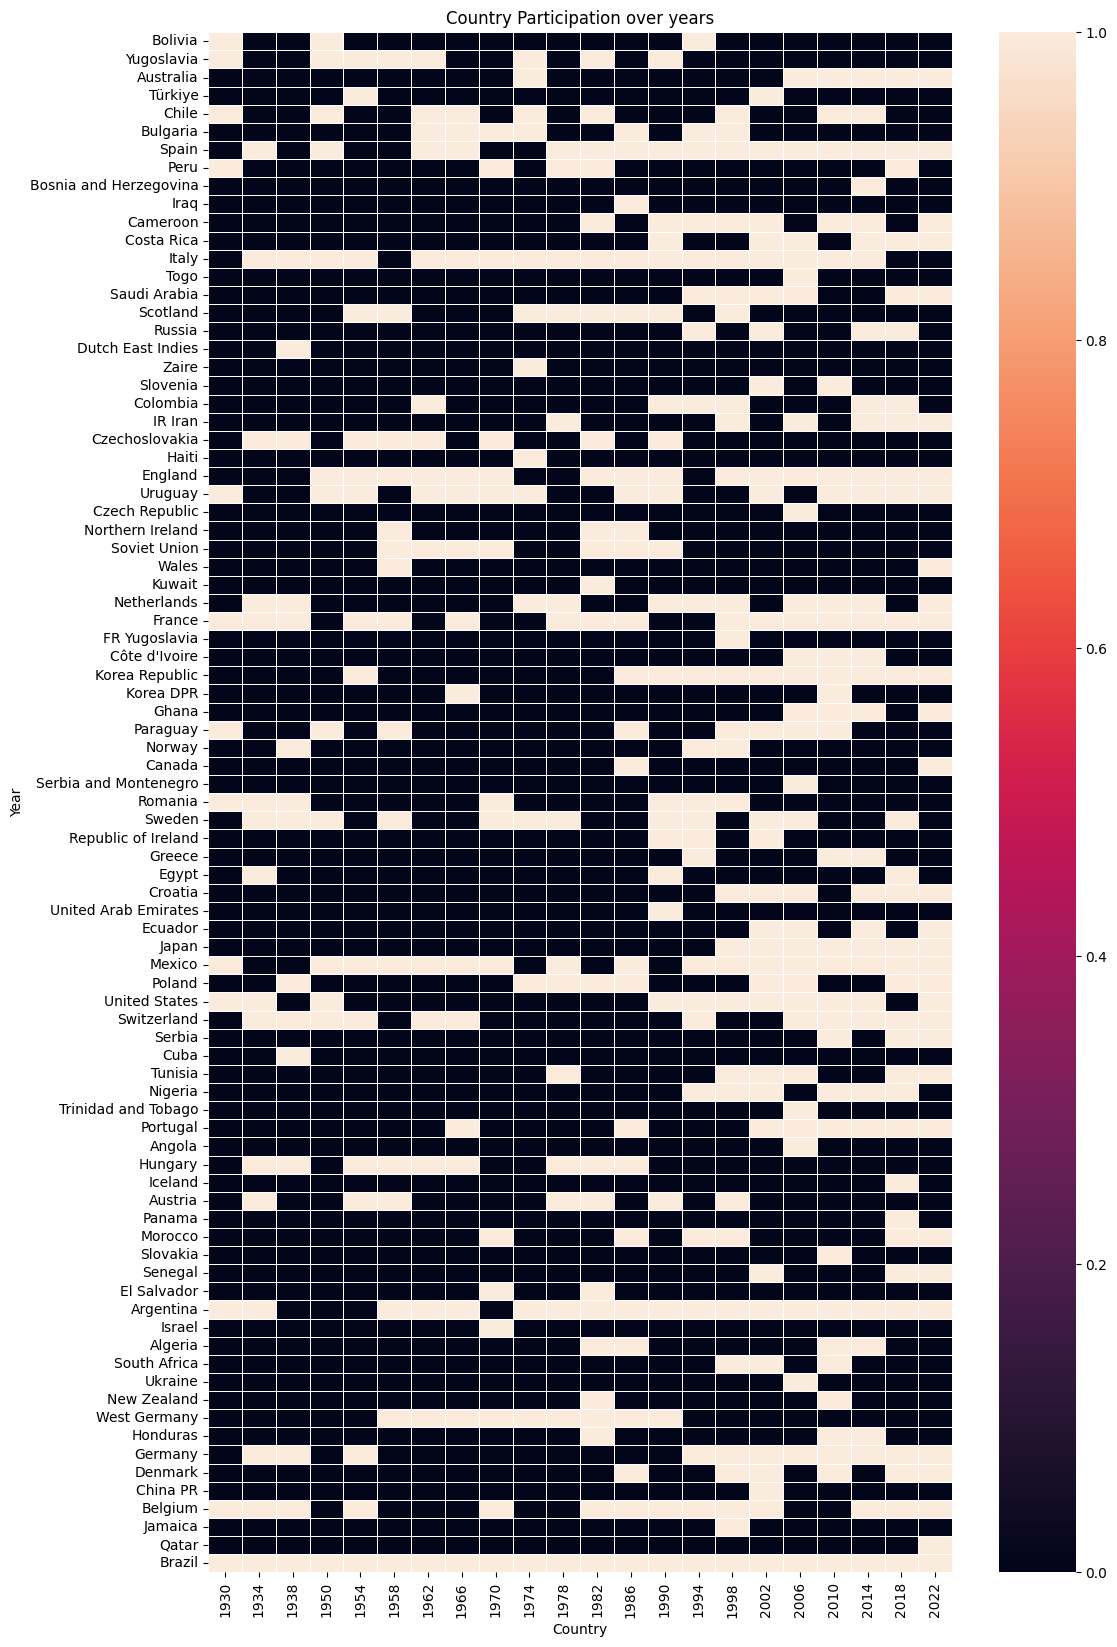

In [38]:
plt.figure(figsize=(12, 20))
sns.heatmap(teams_pivot, linewidths=0.5, linecolor='white')
plt.xlabel("Country")
plt.ylabel("Year")
plt.title("Country Participation over years")

# **CONCLUSION**

* Brazil is the only contry to play all the editions.
* countries like Ghana, Japan, Australia etc have started playing in the recent few editions of FIFA.
* Countries like Kuwait, Jamaica, Ukraine, Tongo etc have only played 1 edition of FIFA.

In [39]:
#check if contry's rank increased, decreased or remained same

In [40]:
fifa_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [41]:
len(fifa_ranking['team'].unique()), len(fifa_ranking)

(211, 211)

In [42]:
rank_same = fifa_ranking[fifa_ranking['rank'] == fifa_ranking['previous_rank']]['team'].tolist()
rank_reduced = fifa_ranking[fifa_ranking['rank'] > fifa_ranking['previous_rank']]['team'].tolist()
rank_increased = fifa_ranking[fifa_ranking['rank'] < fifa_ranking['previous_rank']]['team'].tolist()


In [43]:
print(len(rank_same), len(rank_reduced), len(rank_increased))

66 68 77


In [44]:
max_len = max(len(rank_same), len(rank_reduced), len(rank_increased))
max_len

77

In [45]:
rank_same += [None] * int(max_len-len(rank_same))
rank_reduced += [None] * int(max_len-len(rank_reduced))
rank_increased += [None] * int(max_len-len(rank_increased))

In [46]:
print(len(rank_same), len(rank_reduced), len(rank_increased))

77 77 77


In [47]:
ranking_df = pd.DataFrame(
    {
        'rank_same' : rank_same,
        'rank_reduced' : rank_reduced,
        'rank_increased' : rank_increased,
    }
)

In [48]:
ranking_df.head()

,rank_same,rank_reduced,rank_increased
0,Brazil,Spain,Italy
1,Belgium,Mexico,Croatia
2,Argentina,Uruguay,Switzerland
3,France,USA,IR Iran
4,England,Peru,Serbia


In [49]:
def check_rank_status(countryName):
  for country in ranking_df['rank_same']:
    if(country == countryName):
      print("rank_same")
      return
  for country in ranking_df['rank_reduced']:
    if(country == countryName):
      print("rank reduced")
      return
  print("rank increased")

In [50]:
check_rank_status("England")

rank_same


In [51]:
check_rank_status("Switzerland")

rank increased


In [52]:
check_rank_status("Seychelles")

rank reduced


# **Advance EDA**

In [53]:
# probability of a country to win knockout matches

In [54]:
matches['winner'] = np.where(matches['total_home_goal'] >= matches['total_away_goal'], matches['home_team'], matches['away_team'])

In [55]:
def calculate_probability(country):

  df = matches[(matches['Round'] == 'Final') | (matches['Round'] == 'Semi-finals') | (matches['Round'] == 'Quarter-finals')]
  df = df[['home_team', 'away_team', 'Round', 'winner']]
  df = df[(df['home_team'] == country) | (df['away_team'] == country)]

  total_matches = df['Round'].value_counts().reset_index()
  won_matches =  df[df['winner'] == country]['Round'].value_counts().reset_index()

  results = total_matches
  results['won_count'] = won_matches['count']
  results['win_percentage'] = np.round((results['won_count']/results['count']) * 100).astype(int)

  return results

In [56]:
calculate_probability('Argentina')

,Round,count,won_count,win_percentage
0,Quarter-finals,8,5,62
1,Final,6,4,67
2,Semi-finals,5,3,60


In [57]:
calculate_probability('England')

,Round,count,won_count,win_percentage
0,Quarter-finals,10,3,30
1,Semi-finals,3,1,33
2,Final,1,1,100


In [58]:
calculate_probability('Spain')

,Round,count,won_count,win_percentage
0,Quarter-finals,6,1,17
1,Final,1,1,100
2,Semi-finals,1,1,100


In [59]:
calculate_probability('Brazil')

,Round,count,won_count,win_percentage
0,Quarter-finals,15,9,60
1,Semi-finals,8,6,75
2,Final,6,5,83


# **CONCLUSION**

* Argentina: Achieves a 60% win rate in knockout rounds.

* England: Struggles in quarter-finals and semi-finals but has a perfect record in final matches.

* Spain: Underperforms in quarter-finals but wins all semi-final and final matches.

* Brazil: Wins 60% of quarter-final matches, 75% of semi-final matches, and 83% of final matches, demonstrating strong overall performance in knockout stages.

In [60]:
#checking playing strategy of team in knockout v/s non-knockout match

In [61]:
matches['home_goal'][0]

'Ángel Di María · 36|Lionel Messi · 108'

In [62]:
def get_time(goalinfo):
  if(goalinfo == 'nan'):
    return []
  res = []
  res += goalinfo.split('|')
  res2 = []
  for item in res:
    res2.append(item.split("·")[1].strip())

  res3 = []
  for item in res2:
    res3 += item.split("+")

  res3 = [int(i) for i in res3]

  return res3

In [63]:
matches['home_goal_times'] = matches['home_goal'].apply(lambda x: get_time(str(x)))
matches['away_goal_times'] = matches['away_goal'].apply(lambda x: get_time(str(x)))


In [64]:
matches['isKnockout'] = matches['Round'].apply(lambda x: (x == "Final" or x == "Semi-finals" or x == "Quarter-finals"))

In [65]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,total_home_goal,total_away_goal,winner,home_goal_times,away_goal_times,isKnockout
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,7.0,5.0,Argentina,"[36, 108]",[81],True
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,2.0,1.0,Croatia,"[7, 42]",[9],False
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,2.0,0.0,France,"[5, 79]",[],True
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",3.0,0.0,Argentina,"[39, 69]",[],True
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1.0,0.0,Morocco,[42],[],True


In [66]:
def phrase(time_list, matchPhrase): # used in match_strategy function
    counter = 0
    for time in time_list:
      if(time <= 45 and matchPhrase == "first half"):
        counter += 1
      elif(time > 90 and matchPhrase == "extra"):
        counter += 1
      elif(time > 45 and time <= 90 and matchPhrase == "second half"):
        counter += 1
    return counter

def match_strategy(country):
  knockout_matches = matches[(matches["isKnockout"]) & ((matches['home_team'] == country) | (matches['away_team'] == country))]
  non_knockout_matches = matches[(matches["isKnockout"] == False) & ((matches['home_team'] == country) | (matches['away_team'] == country))]

  k_goal_time_list = list(knockout_matches[knockout_matches['home_team'] == country]['home_goal_times']) + list(knockout_matches[knockout_matches['away_team'] == country]['away_goal_times'])
  k_goal_time_df = pd.DataFrame({
    'goal_time' : k_goal_time_list
    })
  nk_goal_time_list = list(non_knockout_matches[non_knockout_matches['home_team'] == country]['home_goal_times']) + list(non_knockout_matches[non_knockout_matches['away_team'] == country]['away_goal_times'])
  nk_goal_time_df = pd.DataFrame({
    'goal_time' : nk_goal_time_list
    })

  k_goal_time_df['first half'] = k_goal_time_df['goal_time'].apply(lambda x: phrase(x, "first half"))
  k_goal_time_df['second half'] = k_goal_time_df['goal_time'].apply(lambda x: phrase(x, "second half"))
  k_goal_time_df['extra'] = k_goal_time_df['goal_time'].apply(lambda x: phrase(x, "extra"))
  nk_goal_time_df['first half'] = nk_goal_time_df['goal_time'].apply(lambda x: phrase(x, "first half"))
  nk_goal_time_df['second half'] = nk_goal_time_df['goal_time'].apply(lambda x: phrase(x, "second half"))
  nk_goal_time_df['extra'] = nk_goal_time_df['goal_time'].apply(lambda x: phrase(x, "extra"))

  k_total = k_goal_time_df['first half'].sum() + k_goal_time_df['second half'].sum() + k_goal_time_df['extra'].sum()
  if(k_total == 0):
    k_phrase_info = dict({
      'first half goals (%)': 0,
      'second half goals (%)': 0,
      'extra goals (%)': 0,
    })
  else:
    k_phrase_info = dict({
      'first half goals (%)': np.round((k_goal_time_df['first half'].sum() / k_total) * 100),
      'second half goals (%)': np.round((k_goal_time_df['second half'].sum() / k_total) * 100),
      'extra goals (%)': np.round((k_goal_time_df['extra'].sum() / k_total) * 100),
    })

  nk_total = nk_goal_time_df['first half'].sum() + nk_goal_time_df['second half'].sum() + nk_goal_time_df['extra'].sum()
  if(nk_total == 0):
    nk_phrase_info = dict({
      'first half goals (%)': 0,
      'second half goals (%)': 0,
      'extra goals (%)': 0,
    })
  else:
    nk_phrase_info = dict({
    'first half goals (%)': int(np.round((nk_goal_time_df['first half'].sum() / nk_total) * 100)),
    'second half goals (%)': int(np.round((nk_goal_time_df['second half'].sum() / nk_total) * 100)),
    'extra goals (%)': int(np.round((nk_goal_time_df['extra'].sum() / nk_total) * 100)),
  })

  print("Knockout Match info: ")
  print(k_phrase_info)
  print("Non Knockout Match info: ")
  print(nk_phrase_info)


  graph_1 = go.Pie(values=list(k_phrase_info.values()), labels=list(k_phrase_info.keys()), name="Knockout Match")
  graph_2 = go.Pie(values=list(nk_phrase_info.values()), labels=list(nk_phrase_info.keys()), name="Non Knockout Match")

  fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=("Knockout Match", "Non Knockout Match")
    )
  fig.update_layout(
    title_text="Matches Score Distribution",
    width=700,
    height=350
    )

  fig.add_trace(graph_1, row=1, col=1)
  fig.add_trace(graph_2, row=1, col=2)
  fig.show()

In [67]:
match_strategy("Argentina")

Knockout Match info: 
{'first half goals (%)': 37.0, 'second half goals (%)': 52.0, 'extra goals (%)': 11.0}
Non Knockout Match info: 
{'first half goals (%)': 46, 'second half goals (%)': 53, 'extra goals (%)': 1}


In [68]:
match_strategy("Italy")

Knockout Match info: 
{'first half goals (%)': 46.0, 'second half goals (%)': 38.0, 'extra goals (%)': 15.0}
Non Knockout Match info: 
{'first half goals (%)': 42, 'second half goals (%)': 57, 'extra goals (%)': 1}


In [69]:
match_strategy("Peru")

Knockout Match info: 
{'first half goals (%)': 50.0, 'second half goals (%)': 50.0, 'extra goals (%)': 0.0}
Non Knockout Match info: 
{'first half goals (%)': 24, 'second half goals (%)': 76, 'extra goals (%)': 0}


In [70]:
match_strategy("Romania")

Knockout Match info: 
{'first half goals (%)': 0.0, 'second half goals (%)': 50.0, 'extra goals (%)': 50.0}
Non Knockout Match info: 
{'first half goals (%)': 50, 'second half goals (%)': 46, 'extra goals (%)': 4}


In [71]:
match_strategy("Mexico")

Knockout Match info: 
{'first half goals (%)': 100.0, 'second half goals (%)': 0.0, 'extra goals (%)': 0.0}
Non Knockout Match info: 
{'first half goals (%)': 27, 'second half goals (%)': 73, 'extra goals (%)': 0}


In [72]:
match_strategy("Spain")

Knockout Match info: 
{'first half goals (%)': 17.0, 'second half goals (%)': 67.0, 'extra goals (%)': 17.0}
Non Knockout Match info: 
{'first half goals (%)': 44, 'second half goals (%)': 56, 'extra goals (%)': 0}


In [73]:
match_strategy("Canada")

Knockout Match info: 
{'first half goals (%)': 0, 'second half goals (%)': 0, 'extra goals (%)': 0}
Non Knockout Match info: 
{'first half goals (%)': 100, 'second half goals (%)': 0, 'extra goals (%)': 0}


# **CONCLUSION**



* Teams generally exhibit more aggressive play during the second half compared to the first half.

* Romania demonstrates aggressive play in both halves during non-knockout matches, with heightened aggression during the second half and extra time in knockout stages.

* Mexico tends to score fewer goals in the first half but significantly increases their scoring in the second half.

* Canada primarily scores during the first half and has yet to advance to the knockout rounds, indicating an area for potential improvement.



In [74]:
# Team Actual performance vs Team expected performance

In [75]:
home_team_stats = matches.groupby(['home_team', 'Year']).agg({
    'home_score': 'sum',
    'home_xg': 'sum',
}).rename(columns={'home_score': 'Total Goals', 'home_xg': 'Expected Goals'}).reset_index()

away_team_stats = matches.groupby(['away_team', 'Year']).agg({
    'away_score': 'sum',
    'away_xg': 'sum',
}).rename(columns={'away_score': 'Total Goals', 'away_xg': 'Expected Goals'}).reset_index()



In [76]:
home_team_stats = home_team_stats[home_team_stats['Year'] >= 2018]
away_team_stats = away_team_stats[away_team_stats['Year'] >= 2018]

In [77]:
home_team_stats

,home_team,Year,Total Goals,Expected Goals
20,Argentina,2018,1,3.2
21,Argentina,2022,11,9.7
26,Australia,2018,0,0.9
27,Australia,2022,1,0.6
41,Belgium,2018,13,11.2
...,...,...,...,...
380,Tunisia,2022,1,1.4
394,United States,2022,1,0.8
407,Uruguay,2018,6,5.6
408,Uruguay,2022,0,0.6


In [78]:
home_team_stats.rename(columns={'home_team': 'team'}, inplace=True)
away_team_stats.rename(columns={'away_team': 'team'}, inplace=True)

In [79]:
team_stats = pd.merge(home_team_stats, away_team_stats, on = ['team', 'Year'], how='inner')

In [80]:
team_stats['Total Goals'] = team_stats['Total Goals_x'] + team_stats['Total Goals_y']
team_stats['Expected Goals'] = team_stats['Expected Goals_x'] + team_stats['Expected Goals_y']
team_stats['Deviation'] = team_stats['Expected Goals'] - team_stats['Total Goals']
team_stats.rename(columns={'Total Goals_x': 'total_goals_home', 'Total Goals_y': 'total_goals_away'}, inplace=True)
team_stats.rename(columns={'Expected Goals_x': 'expected_goals_home', 'Expected Goals_y': 'expected_goals_away'}, inplace=True)

In [81]:
team_stats

,team,Year,total_goals_home,expected_goals_home,total_goals_away,expected_goals_away,Total Goals,Expected Goals,Deviation
0,Argentina,2018,1,3.2,5,1.7,6,4.9,-1.1
1,Argentina,2022,11,9.7,4,5.4,15,15.1,0.1
2,Australia,2018,0,0.9,2,2.3,2,3.2,1.2
3,Australia,2022,1,0.6,3,1.7,4,2.3,-1.7
4,Belgium,2018,13,11.2,3,2.2,16,13.4,-2.6
...,...,...,...,...,...,...,...,...,...
59,Tunisia,2022,1,1.4,0,0.9,1,2.3,1.3
60,United States,2022,1,0.8,2,3.3,3,4.1,1.1
61,Uruguay,2018,6,5.6,1,1.6,7,7.2,0.2
62,Uruguay,2022,0,0.6,2,3.1,2,3.7,1.7


In [82]:
team_stats[team_stats['team'] == 'Argentina']

,team,Year,total_goals_home,expected_goals_home,total_goals_away,expected_goals_away,Total Goals,Expected Goals,Deviation
0,Argentina,2018,1,3.2,5,1.7,6,4.9,-1.1
1,Argentina,2022,11,9.7,4,5.4,15,15.1,0.1


In [83]:
team_stats[team_stats['team'] == 'Russia']

,team,Year,total_goals_home,expected_goals_home,total_goals_away,expected_goals_away,Total Goals,Expected Goals,Deviation
46,Russia,2018,10,3.9,1,1.1,11,5.0,-6.0


In [84]:
team_stats[team_stats['team'] == 'Netherlands']

,team,Year,total_goals_home,expected_goals_home,total_goals_away,expected_goals_away,Total Goals,Expected Goals,Deviation
37,Netherlands,2022,8,4.0,2,0.7,10,4.7,-5.3


In [85]:
team_stats[team_stats['team'] == 'Portugal']

,team,Year,total_goals_home,expected_goals_home,total_goals_away,expected_goals_away,Total Goals,Expected Goals,Deviation
43,Portugal,2018,4,2.4,2,2.3,6,4.7,-1.3
44,Portugal,2022,11,5.6,1,2.2,12,7.8,-4.2


In [86]:
team_stats[team_stats['team'] == 'Brazil']

,team,Year,total_goals_home,expected_goals_home,total_goals_away,expected_goals_away,Total Goals,Expected Goals,Deviation
6,Brazil,2018,6,10.3,2,1.4,8,11.7,3.7
7,Brazil,2022,7,7.0,1,5.0,8,12.0,4.0


# **CONCLUSION**

* In 2018, Argentina failed to take home advantage and underperformed on home grounds. However they over performed in non home grounds.

* In 2018, Russia was the most attacking team, as they scored 60% more goals than they expected to score.

* Russia was the underdog team in 2018 as it perfomed much more than expected.

* Netherlands was the underdog of 2022 as it scored 52% more goals than expected.

* Among top teams Portugal scored 40% more goals than expected.

* Most overrated team of 2018 and 2022 is Brazil as they socred 32% and 40% less goals than expected in 2018 ans 2022 respectively.